# Лабораторная работа №1. ДВПФ и ДПФ  
Курс: лаборатория цифровой обработки сигналов, МФТИ

# Модуль 1. Свойства ДВПФ.

Организационные объявления. Введение в Python. 
Свойства ДВПФ: масштабирование, смещение, симметрия. 
Вычисление ДВПФ в наборе точек на отрезке $\nu \in [-0.5, 0.5]$.
Примеры: ДВПФ последовательности из $N$ импульсов, ДВПФ окна Ханна. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# Если используете Jupyter, то можно поменять backend
# %matplotlib notebook
%matplotlib inline

## Организационные объявления

**Материалы занятий**
* Материалы размещаются на сайте кафедры и в LMS.
* * http://kprf.mipt.ru/ -> Учебные курсы -> Альтернативные курсы -> Лаборатория цифровой обработки сигналов. 
* * Гостевая авторизация логин `student` пароль `student5xx`.

**Лабораторные работы**
* Три лабораторные работы в каждом семестре (осеннем и весеннем) с обработкой данных и компьютерным моделированием на  Python.
* Оценка каждом в семестре (диф. зачет) - среднее по трем лабораторным работам при условии, что все три работы сданы.
* Отчет о выполнении лабораторной работы в формате файла `.ipynb`. 
* Уважительная причина отсутствия на сдаче лабораторной работы (как и на контрольной работе на лекции) подтверждается справкой либо допуском из деканата.
* Максимальная возможная оценка снижается на один балл по пятибалльной системе (и затем еще на один балл), если сдавать лабораторную работу после наступления даты сдачи следующей лабораторной работы. Таким образом, за лабораторную работу №1 при сдаче 11 ноября 2024 г. можно получить максимум хор.(7), а при сдаче 9 декабря 2024 г. -- максимум удовл.(4). Даты приведены для 2024-2025 уч. года. 

##  Введение в Python. 
В качестве средства моделирования мы будем использовать библиотеки языка Python 3 Numpy, SciPy, MatPlotLib.
###  Anaconda
Anaconda — дистрибутив языков программирования Python и R, включающий набор популярных библиотек научных и инжереных расчетов, таких как NumPy, SciPy и Matplotlib, интегрированные среды разработки (Spyder, Jupyter Notebook и др.). 

* Установить дистрибутив Anaconda для Python 3 https://www.anaconda.com/download
* Открыть файл в приложении Jupyter Notebook.
* Проследить, что формат загружаемого с сайта кафедры файла `.ipynb`, а не `.txt`.

### Примеры IDE для Python 

**Spyder** — свободная и кроссплатформенная интерактивная IDE для научных расчетов на языке Python, обеспечивающая простоту использования функциональных возможностей и легковесность программной части.

**Jupyter Notebook** – интерактивная оболочка для различных языков программирования (в том числе Python), позволяющая объединить код, текст, формулы, результаты вычислений и графики в один документ и распространять его для других пользователей с сохранением возможности повторения вычислений. Расширение файлов .ipynb (IPython Notebook).

**Google Colaboratory** — онлайн-сервис, позволяющий работать с блокнотами .ipynb и производить эффективные вычисления с помощью виртуальных машин в облаке. Сайт проекта https://colab.research.google.com/




### Базовые числовые типы языка Python

**int** - целые числа

In [3]:
a=5
print(a)
print(type(a))

5
<class 'int'>


In [4]:
a

5

Интерпретатор сам подобрал тип переменной.

In [5]:
a=314159265358979323846264338327950288419716939937510
print(a)
print(type(a))

314159265358979323846264338327950288419716939937510
<class 'int'>


Числа типа int могут быть достаточно большими, однако должно быть достаточно памяти для их хранения.

**float** - вещественные числа

In [6]:
a=5.0
print(a)
print(type(a))


5.0
<class 'float'>


In [7]:
b=int(a)
print(b)
print(type(b))

5
<class 'int'>


In [8]:
a=3.14159
print(a)
print(type(a))

3.14159
<class 'float'>


In [9]:
a=2.5e6
print(a)

2500000.0


In [10]:
1e6

1000000.0

**complex** - комплексные числа. Название переменной не может начинаться с цифры, запись `1j` означает мнимую единицу:
* `j` — это переменная,
* `1j` — это константа (перменная не может начинаться с цифры).

In [11]:
a = 5+1j
print(a)
print(type(a))
print(a.real)
print(a.imag)

(5+1j)
<class 'complex'>
5.0
1.0


In [12]:
a = 5+1.4j
print(a)
print(type(a))
print(a.real)
print(a.imag)

(5+1.4j)
<class 'complex'>
5.0
1.4


Числовые переменные поддерживают набор базовых операций, таких как сложение `+`, вычитание `-`, умножение `*`, деление `/`, нахождение частного от деления `//`, отстатка от деления `%`, возведение в степень `**`.


In [13]:
a=5
b=2
print('a + b = ', a+b)
print('a - b = ', a-b)
print('a * b = ', a*b)
print('a / b = ', a/b)
print('a // b = ', a//b)
print('a % b = ', a%b)
print('a ** b = ', a**b)

a + b =  7
a - b =  3
a * b =  10
a / b =  2.5
a // b =  2
a % b =  1
a ** b =  25


### Список/кортеж

```a``` - список (list), поддерживает операцию ```append```

In [14]:
a=[1,2,3,4]
a.append(5)
a

[1, 2, 3, 4, 5]

```a``` - кортеж (tuple), **не поддерживает операцию ```append```

In [15]:
a=(1,2,3,4)
try:
    a.append(5)
except AttributeError:
    print('AttributeError: tuple object has no attribute append')

AttributeError: tuple object has no attribute append


### Импорт библиотек

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import *
from scipy.signal import *

`import` <библиотека> `as` <имя> — этот код позволяет присоединять библиотеки (или функции) к проекту и вызывать их по данному имени, например более короткому или более удобному.    
Например общепринято библиотеку `numpy` именовать как `np`. NumPy это одна из основных библиотек, которая позволяет работать с большими многомерными массивами и матрицами, а также добавляет много быстрых высокоуровневых математических функций, для работы с этими массивами. Чуть более подробно будет рассмотрено ниже.

`from` <библиотека> `import` <имя> — эта запись добавляет из библиотеки (или модуля) в проект конкретный модуль (или функцию). Если поставить *, то будут подгружены все функции этого модуля.

### NumPy

**NumPy** — это библиотека с открытым исходным кодом, которая поддерживает работу с многомерными массивами и позволяет выполнять высокоуровневые математические операции над ними.
Соглашение об импорте:

In [17]:
import numpy as np

Самый простой способ создать массив, это обратиться к функции из библиотеки `NumPy` `array()`.   


In [18]:
x=np.array([1,2,3,4])
x

array([1, 2, 3, 4])

Если известен точно шаг последовательности, то ее можно задать с помощью функции `arange()` из библиотеки `numpy`. Где `start` это первый элемент последовательности, `stop` это элемент который ограничивает последовательность (сам элемент в нее не включается) и `step` это шаг последовательности, т.е. разница между двумя соседними элементами.

In [19]:
x=np.arange(start=1, stop=11, step=1)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Существует способ создать массив нулевых элементов.

In [20]:
x=np.zeros(5)
x

array([0., 0., 0., 0., 0.])

In [21]:
x=np.zeros(5, dtype=complex)
x

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])

Следующий пример демонстрирует создание массива единиц.

In [22]:
x=np.ones(5)
x

array([1., 1., 1., 1., 1.])

Часто требуется создать массив, заполненый случайными числами. `np.random.rand()` создает массив случайных чисел с равномерным распределением от 0 до 1. Можно например создавать массив случайных чисел с нормальным распределением. Для этого нужно использовать функцию `np.random.randn()`. Более подробно об этих  возможностях описано [здесь](https://numpy.org/doc/stable/reference/random/index.html#quick-start).


In [23]:
x=np.random.rand(5)
x

array([0.31036249, 0.43776593, 0.87721916, 0.9716463 , 0.05901513])

Кроме `arange` есть еще функция `linspace`. Эта функция работает подобно `arange` только вместо шага нужно указать кол-во элементов массива.


In [24]:
x=np.linspace(start=1, stop=25, num=4)
x

array([ 1.,  9., 17., 25.])

Рассмотрим некоторые функции, которые применяются к каждому элементу массива.


In [25]:
k=np.arange(10)
print(k)

[0 1 2 3 4 5 6 7 8 9]


In [26]:
k=np.arange(10)
x=np.sin(2*np.pi*0.2*k)
x

array([ 0.00000000e+00,  9.51056516e-01,  5.87785252e-01, -5.87785252e-01,
       -9.51056516e-01, -2.44929360e-16,  9.51056516e-01,  5.87785252e-01,
       -5.87785252e-01, -9.51056516e-01])

In [27]:
k=np.arange(10)
x=np.cos(2*np.pi*0.2*k)
x

array([ 1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699,
        1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699])

In [28]:
k=np.arange(10)
x=np.exp(-1j*2*np.pi*0.2*k)
x

array([ 1.        +0.00000000e+00j,  0.30901699-9.51056516e-01j,
       -0.80901699-5.87785252e-01j, -0.80901699+5.87785252e-01j,
        0.30901699+9.51056516e-01j,  1.        +2.44929360e-16j,
        0.30901699-9.51056516e-01j, -0.80901699-5.87785252e-01j,
       -0.80901699+5.87785252e-01j,  0.30901699+9.51056516e-01j])

###  SciPy
SciPy — библиотека для языка программирования Python с открытым исходным кодом, предназначенная для выполнения научных и инженерных расчётов.
SciPy Reference https://docs.scipy.org/doc/scipy/reference/
* Fourier Transforms (scipy.fft) Дискретное преобразование Фурье
* Signal Processing (scipy.signal) Обработка сигналов
* Linear Algebra (scipy.linalg) Линейная алгебра
* Optimization (scipy.optimize) Численные методы оптимизации
* Interpolation (scipy.interpolate) Интерполяция
* Multidimensional image processing (scipy.ndimage) Цифровая обработка изображений

###  Matplotlib
Matplotlib — библиотека на языке программирования Python для визуализации данных двумерной и трехмерной графикой. https://matplotlib.org/

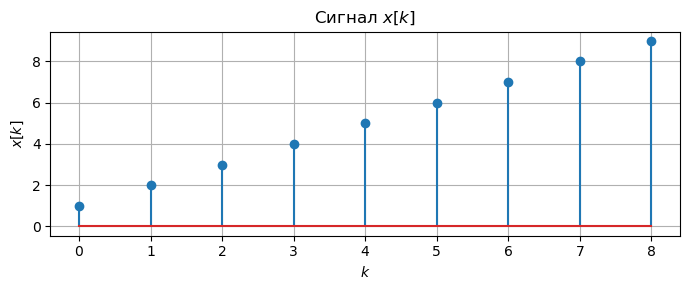

In [29]:
import matplotlib.pyplot as plt # импорт бибилиотеки
plt.figure(figsize=[7, 3], dpi=100) # размер полотна,число точек на дюйм
x=np.array([1,2,3,4, 5, 6, 7, 8, 9])  
k=np.arange(x.size) 
plt.stem(k,x) # график отсчетов
plt.xlabel("$k$")  # подпись оси абсцисс
plt.ylabel("$x[k]$") # подпись оси ординат
plt.xticks(ticks=np.arange(x.size)) # шкала
plt.title("Сигнал $x[k]$") # заголовок 
plt.grid() # сетка
plt.tight_layout()
plt.show()

In [30]:
# Если используете Jupyter, то можно поменять backend
%matplotlib notebook
# %matplotlib inline

## Формулы ДВПФ анализа и синтеза
Пара дискретного во времени преобразования Фурье (ДВПФ) имеет вид
$$X\left( f \right)=\sum\limits_{k=-\infty }^{\infty }{x}[k]\exp (-j2\pi fk\Delta t),$$
$$x[k]=\frac{1}{{{f}_{\text{д}}}}\int_{-{{f}_{\text{д}}}/2}^{{{f}_{\text{д}}}/2}{X}\left( f \right)\exp (j2\pi fk\Delta t)df.$$
Введем нормированные частоты $\nu =f/{{f}_{\text{д}}}=f\Delta t$. Тогда пара ДВПФ может быть записана следующим образом:
$$X(\nu )=\sum\limits_{k=-\infty }^{\infty }{x}[k]\exp (-j2\pi \nu k),$$
$$x[k]=\int_{-1/2}^{1/2}{X}(\nu )\exp (j2\pi \nu k)d\nu .$$


## Вычисление ДВПФ в наборе точек на отрезке $\nu \in [-0.5, 0.5]$.

In [31]:
def dtft(x, M=1024):
    return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(x, M))

## Пример. Последовательность единичных импульсов
Рассмотрим последовательность из 10 единичных импульсов. $x[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}[k-m].$
$$X(\nu )=\sum\limits_{k=-\infty }^{\infty }{x}[k]\exp (-j2\pi \nu k)=\sum\limits_{k=0}^{N-1}{\exp (-j2\pi \nu k)}=\frac{1-\exp (-j2\pi \nu N)}{1-\exp (-j2\pi \nu )}=$$
$$=\frac{{{e}^{-j\pi \nu N}}}{{{e}^{-j\pi \nu }}}\frac{({{e}^{j\pi \nu N}}-{{e}^{-j\pi \nu N}})}{({{e}^{j\pi \nu }}-{{e}^{-j\pi \nu }})}=\frac{\sin (N\pi \nu )}{\sin (\pi \nu )}\exp (-j(N-1)\pi \nu ).$$
Модуль ДВПФ $\left| X(\nu ) \right|=\left| \dfrac{\sin (N\pi \nu )}{\sin (\pi \nu )} \right|$, фаза $\varphi(\nu)= \text{arctg} \dfrac{\text{Im} X(\nu)}{\text{Re} X(\nu)}$


In [32]:
N=10
x = np.ones(N)
k=np.arange(x.size)
print('x = ', x)
print('k = ', k)

x =  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
k =  [0 1 2 3 4 5 6 7 8 9]


$x[k]=\sum\limits_{m=0}^{N-1}{\mathbf{1}}[k-m].$

<IPython.core.display.Javascript object>


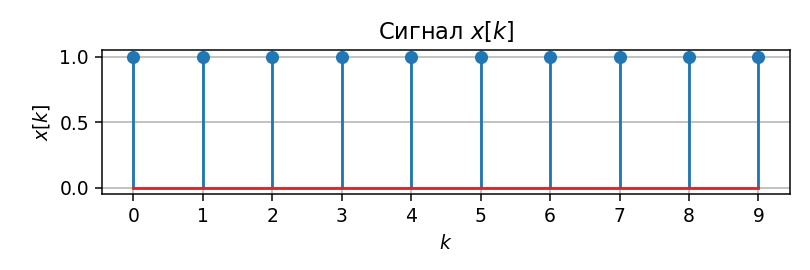

In [33]:
figure1 = plt.figure(figsize=[6, 2], dpi=120)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(k, x)
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

$\left| X(\nu ) \right|=\left| \dfrac{\sin (N\pi \nu )}{\sin (\pi \nu )} \right|$

In [34]:
nu, X = dtft(x, M=1024)

<IPython.core.display.Javascript object>


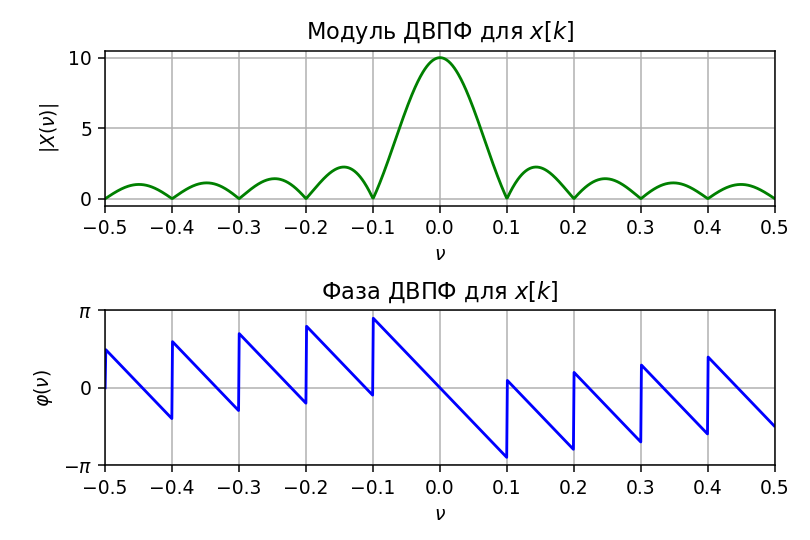

In [35]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, abs(X), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $x[k]$")
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, np.angle(X), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$\\varphi(\\nu)$")
plt.yticks([-np.pi, 0, np.pi], labels=("$-\\pi$", "0", "$\\pi$"))
plt.xlim([-0.5, 0.5])
plt.title("Фаза ДВПФ для $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
X

array([0.        +0.j        , 0.00084688+0.03066325j,
       0.00338468+0.06122841j, ..., 0.00760489-0.09159769j,
       0.00338468-0.06122841j, 0.00084688-0.03066325j])

In [37]:
X.real

array([0.        , 0.00084688, 0.00338468, ..., 0.00760489, 0.00338468,
       0.00084688])

In [38]:
X.imag

array([ 0.        ,  0.03066325,  0.06122841, ..., -0.09159769,
       -0.06122841, -0.03066325])

In [39]:
np.angle(X)

array([ 0.        ,  1.54318467,  1.51557302, ..., -1.48796136,
       -1.51557302, -1.54318467])

In [40]:
abs(X)

array([0.        , 0.03067495, 0.06132189, ..., 0.09191285, 0.06132189,
       0.03067495])

<IPython.core.display.Javascript object>


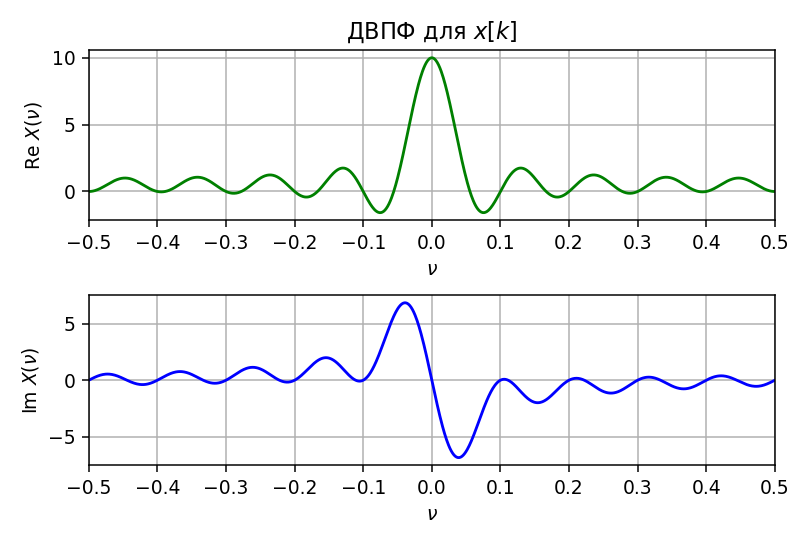

In [41]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, X.real, 'g')
plt.xlabel("$\\nu$")
plt.ylabel("Re $X(\\nu)$")
plt.xlim([-0.5, 0.5])
plt.title("ДВПФ для $x[k]$")
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu, X.imag, 'b')
plt.xlabel("$\\nu$")
plt.ylabel("Im $X(\\nu)$")
plt.xlim([-0.5, 0.5])
plt.grid()
plt.tight_layout()
plt.show()

## Свойство маштабирования ДВПФ

In [42]:
N=10
x=np.ones(N)
x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
L=4
y=np.zeros(N*L)
y[::L]=x
y

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0.])

<IPython.core.display.Javascript object>


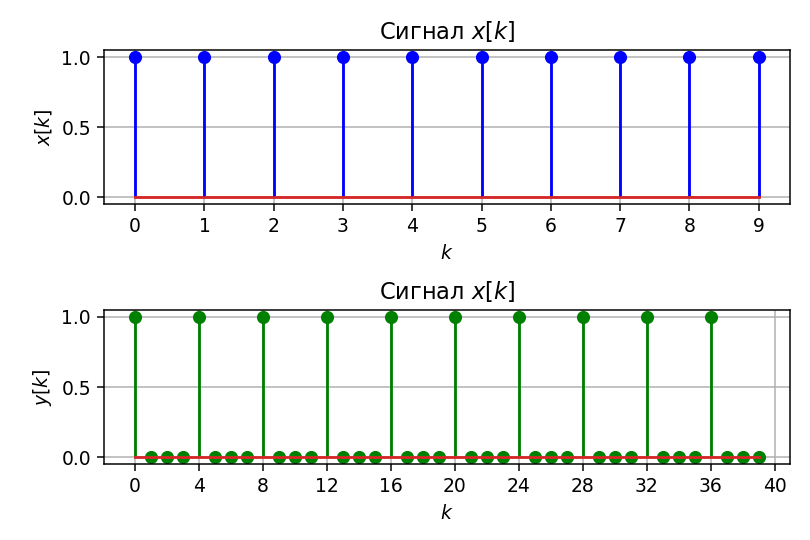

In [44]:
figure1 = plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(x.size), x, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=L))
plt.stem(np.arange(y.size), y, linefmt='g', markerfmt='go')
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

In [45]:
def dtft(x, M=1024):
    return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(x, M))

nu_x, X = dtft(x)
nu_y, Y = dtft(y)

<IPython.core.display.Javascript object>


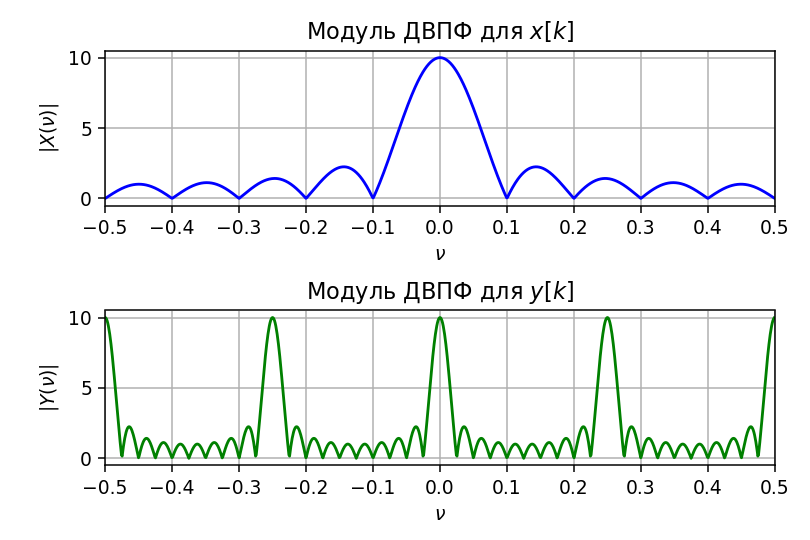

In [46]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_x, abs(X), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $x[k]$")
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_y, abs(Y), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()

## Теорема смещения для ДВПФ 

In [47]:
N = 10
nu_0 = 0.1
x = np.ones(N)
k = np.arange(N)
y = x * np.exp(-1j*2*np.pi*nu_0*k)

Если раскомментировать строку 11, то возникнет **ComplexWarning: Casting complex values to real**

<IPython.core.display.Javascript object>


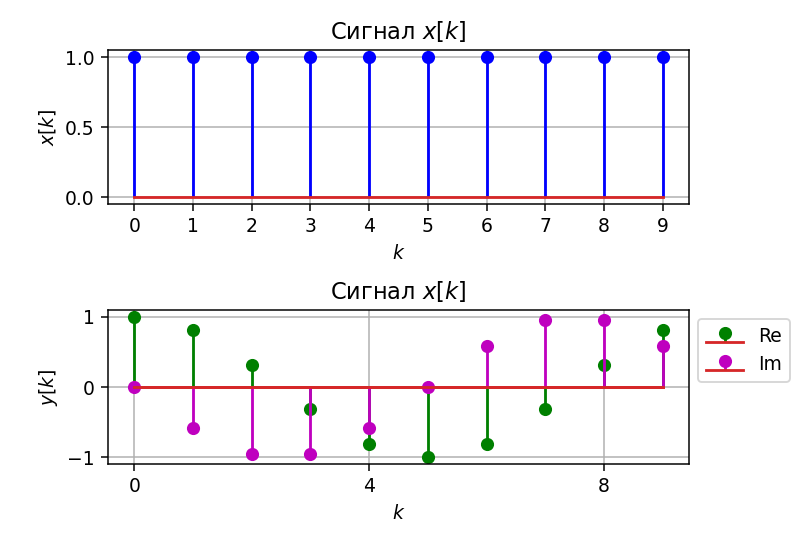

In [48]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(x.size), x, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=L))
#plt.stem(np.arange(y.size), y, 'g', 'go')
plt.stem(np.arange(y.size), y.real, linefmt='g', markerfmt='go', label="Re")
plt.stem(np.arange(y.size), y.imag, linefmt='m', markerfmt='mo', label="Im")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


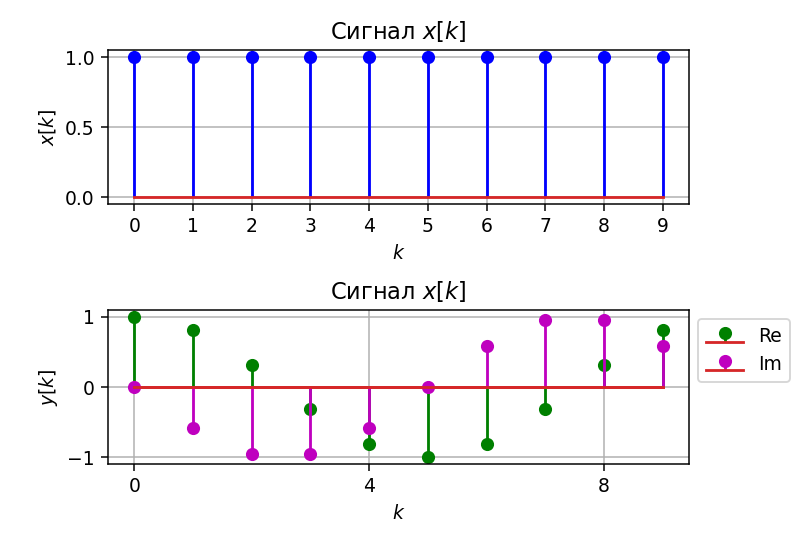

In [49]:
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
plt.stem(np.arange(x.size), x, linefmt='b', markerfmt='bo')
plt.xlabel("$k$")
plt.ylabel("$x[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=L))
#plt.stem(np.arange(y.size), y, 'g', 'go')
plt.stem(np.arange(y.size), y.real, linefmt='g', markerfmt='go', label="Re")
plt.stem(np.arange(y.size), y.imag, linefmt='m', markerfmt='mo', label="Im")
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("$k$")
plt.ylabel("$y[k]$")
plt.title("Сигнал $x[k]$")
plt.grid()
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


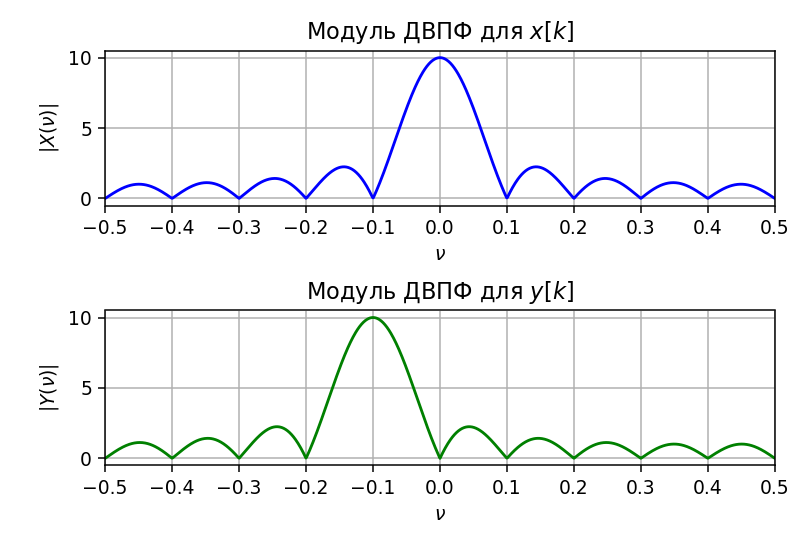

In [50]:
def dtft(x, M=1024):
    return -0.5 + np.arange(M)/M, np.fft.fftshift(np.fft.fft(x, M))

nu_x, X=dtft(x)
nu_y, Y=dtft(y)
plt.figure(figsize=[6, 4], dpi=120)
ax1 = plt.subplot(2, 1, 1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_x, abs(X), 'b')
plt.xlabel("$\\nu$")
plt.ylabel("$|X(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $x[k]$")
plt.grid()
ax2 = plt.subplot(2, 1, 2)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=0.1))
plt.plot(nu_y, abs(Y), 'g')
plt.xlabel("$\\nu$")
plt.ylabel("$|Y(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.title("Модуль ДВПФ для $y[k]$")
plt.grid()
plt.tight_layout()
plt.show()

## ДВПФ окна Ханна


Построим графики для ДВПФ последовательности (окно Ханна для ДПФ)
$$
\begin{equation} 
w[k]=\left\{\begin{array}{l} \dfrac{1}{2} \left(1-\cos\left(\dfrac{ 2 \pi}{N} k\right)\right)  ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при $N=16$ с использованием функций `fft(w, N)` и `fftshift(W)`.


---



<IPython.core.display.Javascript object>


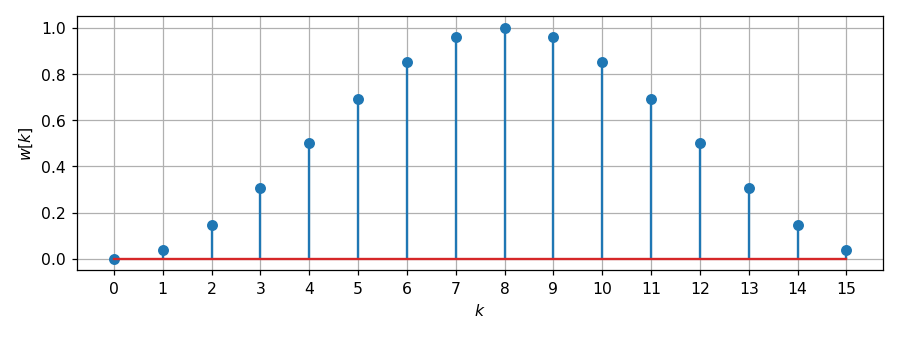

In [51]:
N=16
k = np.arange(0, N, 1)
w = 0.5*(np.ones(N)-np.cos(2*np.pi*k/N))
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(k, w)
plt.xlabel("$k$")
plt.ylabel("$w[k]$")
plt.xticks(ticks=k)
plt.grid()
plt.tight_layout()
plt.show()

In [52]:
from numpy.fft import fft, fftshift

Вычислим значения ДВПФ этой последовательности $W(\nu)$ в 2048 точках на отрезке $\nu=[0, 1]$.

In [53]:
W=fft(w, 2048)

Получим значени в 2048 точках на отрезке  $\nu=[-0.5, 0.5]$ с помощью `fftshift`.

In [54]:
W=fftshift(W)

Эти точки задаются по формуле $\nu_n=-0.5+\dfrac{n}{M}$, где $n=0, 1, 2, \dots, M-1$, $M=2048.$

In [55]:
M=2048
nu=-0.5+np.arange(M)/M
nu

array([-0.5       , -0.49951172, -0.49902344, ...,  0.49853516,
        0.49902344,  0.49951172])

<IPython.core.display.Javascript object>


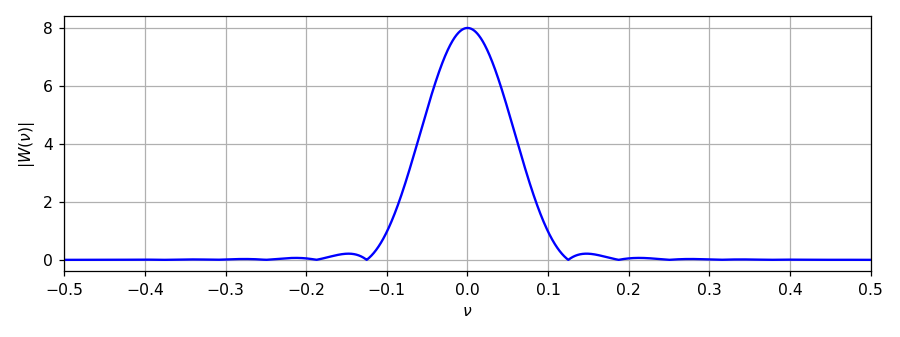

In [56]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(nu, abs(W), 'b')
plt.xlabel(u"$\\nu$")
plt.ylabel(u"$|W(\\nu)|$")
plt.xlim([-0.5, 0.5])
plt.xticks(-0.5+np.arange(10+1)/10)
plt.grid()
plt.tight_layout()
plt.show()